In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from datetime import date,timedelta

In [4]:
df = pd.read_excel('data_for_rfm.xlsx')

In [5]:
df = df.rename(columns=lambda c: c.lower().replace('-', '_').replace('/', '_').replace(' ', '_'))

In [6]:
df

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country_region,city,...,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2016-110422,2016-01-21,2016-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2019-121258,2019-02-26,2019-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2019-121258,2019-02-26,2019-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2019-121258,2019-02-26,2019-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [7]:
df=df.fillna(0)

In [8]:
df.customer_id.isna().sum()

0

In [9]:
df['quantity'].describe()

count    9994.000000
mean        3.789574
std         2.225110
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        14.000000
Name: quantity, dtype: float64

In [10]:
df['sales'].describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: sales, dtype: float64

<AxesSubplot:>

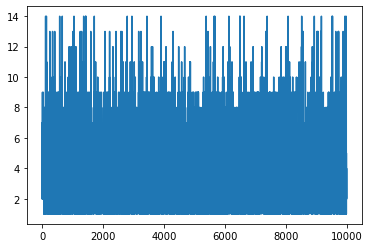

In [11]:
df['quantity'].plot()

<AxesSubplot:>

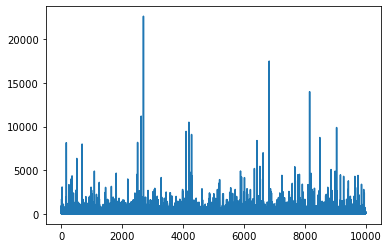

In [12]:
df['sales'].plot()

In [13]:
df_1=df.query('sales < 14000')

In [14]:
df_1

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country_region,city,...,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2016-110422,2016-01-21,2016-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2019-121258,2019-02-26,2019-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2019-121258,2019-02-26,2019-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2019-121258,2019-02-26,2019-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [15]:
df_1['total_sum']=df_1.sales*df_1.quantity

/var/folders/s6/0ph0fn913s50lnlp7h6glhmr0000gn/T/ipykernel_34980/3744242652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['total_sum']=df_1.sales*df_1.quantity


In [16]:
df_abc = df_1.groupby('customer_id', as_index = False).agg({'total_sum': 'sum'}).sort_values('total_sum', ascending = False)

In [17]:
df_abc

,customer_id,total_sum
6,AB-10105,143857.709
90,BM-11140,88175.266
371,JH-15985,80520.042
434,KL-16645,74912.313
311,GT-14710,73016.052
...,...,...
145,CJ-11875,82.600
659,RS-19870,81.368
508,MG-18205,74.857
456,LD-16855,15.912


In [18]:
total_sum = df_abc.total_sum.sum()

In [19]:
total_sum

11264731.441899998

In [20]:
df_abc['share_of_total']=df_abc.total_sum/total_sum*100

In [21]:
df_abc

,customer_id,total_sum,share_of_total
6,AB-10105,143857.709,1.277063
90,BM-11140,88175.266,0.782755
371,JH-15985,80520.042,0.714798
434,KL-16645,74912.313,0.665016
311,GT-14710,73016.052,0.648183
...,...,...,...
145,CJ-11875,82.600,0.000733
659,RS-19870,81.368,0.000722
508,MG-18205,74.857,0.000665
456,LD-16855,15.912,0.000141


In [22]:
df_abc['cum_sum']=df_abc.share_of_total.cumsum()

In [23]:
df_abc

,customer_id,total_sum,share_of_total,cum_sum
6,AB-10105,143857.709,1.277063,1.277063
90,BM-11140,88175.266,0.782755,2.059818
371,JH-15985,80520.042,0.714798,2.774616
434,KL-16645,74912.313,0.665016,3.439632
311,GT-14710,73016.052,0.648183,4.087815
...,...,...,...,...
145,CJ-11875,82.600,0.000733,99.998379
659,RS-19870,81.368,0.000722,99.999101
508,MG-18205,74.857,0.000665,99.999766
456,LD-16855,15.912,0.000141,99.999907


In [24]:
df_abc['abc'] = np.where(df_abc['cum_sum']<80, 'A', np.where((df_abc['cum_sum']<95), 'B', 'C'))

In [25]:
df_abc

,customer_id,total_sum,share_of_total,cum_sum,abc
6,AB-10105,143857.709,1.277063,1.277063,A
90,BM-11140,88175.266,0.782755,2.059818,A
371,JH-15985,80520.042,0.714798,2.774616,A
434,KL-16645,74912.313,0.665016,3.439632,A
311,GT-14710,73016.052,0.648183,4.087815,A
...,...,...,...,...,...
145,CJ-11875,82.600,0.000733,99.998379,C
659,RS-19870,81.368,0.000722,99.999101,C
508,MG-18205,74.857,0.000665,99.999766,C
456,LD-16855,15.912,0.000141,99.999907,C


In [26]:
df_abc.abc.value_counts()

A    362
C    216
B    215
Name: abc, dtype: int64

In [27]:
df_abc.abc.count()

793

In [28]:
215/793*100 #группа B

27.112232030264817

In [29]:
216/793*100 #группа C

27.238335435056747

In [30]:
362/793*100 #группа А

45.64943253467844

In [31]:
#Уровень доходности клиентов из группы А
df_A=df_abc.query('abc == "A"')
df_A.total_sum.sum()/df_abc.total_sum.sum()*100

79.94644219392964

In [32]:
#Уровень доходности клиентов из группы B
df_B=df_abc.query('abc == "B"')
df_B.total_sum.sum()/df_abc.total_sum.sum()*100

15.023292306865308

In [33]:
#Уровень доходности клиентов из группы C
df_C=df_abc.query('abc == "C"')
df_C.total_sum.sum()/df_abc.total_sum.sum()*100

5.030265499205058

In [34]:
df_abc.query('abc == "A"')

,customer_id,total_sum,share_of_total,cum_sum,abc
6,AB-10105,143857.709,1.277063,1.277063,A
90,BM-11140,88175.266,0.782755,2.059818,A
371,JH-15985,80520.042,0.714798,2.774616,A
434,KL-16645,74912.313,0.665016,3.439632,A
311,GT-14710,73016.052,0.648183,4.087815,A
...,...,...,...,...,...
657,RS-19420,11078.210,0.098344,79.556358,A
313,GW-14605,11015.205,0.097785,79.654143,A
528,MN-17935,10980.394,0.097476,79.751618,A
132,CC-12430,10977.626,0.097451,79.849070,A


In [147]:
df_abc.query('abc == "B"')

,customer_id,total_sum,share_of_total,cum_sum,abc
555,NC-18415,10929.0300,0.097020,80.043462,B
687,SG-20080,10925.1930,0.096986,80.140448,B
700,SM-20320,10918.8900,0.096930,80.237378,B
733,TB-21190,10916.5560,0.096909,80.334287,B
511,MH-17455,10914.5980,0.096892,80.431179,B
...,...,...,...,...,...
331,HR-14770,5337.0160,0.047378,94.782557,B
169,CR-12820,5326.3404,0.047283,94.829840,B
231,DP-13165,5297.2480,0.047025,94.876865,B
398,JO-15550,5233.5060,0.046459,94.923324,B


In [148]:
df_abc.query('abc == "C"')

,customer_id,total_sum,share_of_total,cum_sum,abc
713,SS-20140,5144.496,0.045669,95.015404,C
503,MG-17680,5122.490,0.045474,95.060877,C
293,GA-14725,5117.588,0.045430,95.106307,C
100,BP-11155,5108.773,0.045352,95.151659,C
634,RD-19810,5103.796,0.045308,95.196967,C
...,...,...,...,...,...
145,CJ-11875,82.600,0.000733,99.998379,C
659,RS-19870,81.368,0.000722,99.999101,C
508,MG-18205,74.857,0.000665,99.999766,C
456,LD-16855,15.912,0.000141,99.999907,C


In [149]:
df_xyz = df_1.groupby('customer_id', as_index = False).agg({'quantity': 'count'}).sort_values('quantity', ascending = False)

In [150]:
df_xyz

,customer_id,quantity
787,WB-21850,37
387,JL-15835,34
482,MA-17560,34
606,PP-18955,34
720,SV-20365,32
...,...,...
42,AO-10810,1
403,JR-15700,1
145,CJ-11875,1
637,RE-19405,1


In [151]:
df_xyz.describe([0.33, 0.66, 0.99])[["quantity"]].T

,count,mean,std,min,33%,50%,66%,99%,max
quantity,793.0,12.600252,6.242397,1.0,9.0,12.0,14.0,31.08,37.0


In [152]:
df_xyz['xyz'] = np.where(df_xyz['quantity']<9, 'Z', np.where((df_xyz['quantity']<14), 'Y', 'X'))

In [153]:
df_xyz

,customer_id,quantity,xyz
787,WB-21850,37,X
387,JL-15835,34,X
482,MA-17560,34,X
606,PP-18955,34,X
720,SV-20365,32,X
...,...,...,...
42,AO-10810,1,Z
403,JR-15700,1,Z
145,CJ-11875,1,Z
637,RE-19405,1,Z


In [154]:
df_xyz.query('xyz=="X"')

,customer_id,quantity,xyz
787,WB-21850,37,X
387,JL-15835,34,X
482,MA-17560,34,X
606,PP-18955,34,X
720,SV-20365,32,X
...,...,...,...
769,TT-21070,14,X
255,ED-13885,14,X
768,TS-21655,14,X
177,CS-12400,14,X


In [155]:
df_xyz.query('xyz=="Y"')

,customer_id,quantity,xyz
751,TH-21235,13,Y
78,BF-10975,13,Y
401,JP-16135,13,Y
425,KD-16615,13,Y
163,CM-12715,13,Y
...,...,...,...
313,GW-14605,9,Y
416,KB-16405,9,Y
437,KM-16660,9,Y
557,NC-18625,9,Y


In [156]:
df_xyz.query('xyz=="Z"')

,customer_id,quantity,xyz
187,DA-13450,8,Z
500,MF-17665,8,Z
789,YC-21895,8,Z
496,MD-17860,8,Z
153,CL-12700,8,Z
...,...,...,...
42,AO-10810,1,Z
403,JR-15700,1,Z
145,CJ-11875,1,Z
637,RE-19405,1,Z


In [157]:
df_xyz.xyz.count()

793

In [158]:
df_total = df_abc.merge(df_xyz, on ='customer_id')

In [159]:
df_total

,customer_id,total_sum,share_of_total,cum_sum,abc,quantity,xyz
0,AB-10105,143857.709,1.277063,1.277063,A,20,X
1,BM-11140,88175.266,0.782755,2.059818,A,16,X
2,JH-15985,80520.042,0.714798,2.774616,A,14,X
3,KL-16645,74912.313,0.665016,3.439632,A,29,X
4,GT-14710,73016.052,0.648183,4.087815,A,29,X
...,...,...,...,...,...,...,...
788,CJ-11875,82.600,0.000733,99.998379,C,1,Z
789,RS-19870,81.368,0.000722,99.999101,C,3,Z
790,MG-18205,74.857,0.000665,99.999766,C,2,Z
791,LD-16855,15.912,0.000141,99.999907,C,1,Z


In [160]:
pd.crosstab(df_total.abc, df_total.xyz)

xyz,X,Y,Z
abc,,,
A,218,108,36
B,76,88,51
C,18,68,130


In [165]:
print('Зеленая группа (AX, BX, CX и AY- самые прибыльные товары, на которых следует сосредоточить свои усилия', round((((218+76+18+108)/793)*100), 2),'%')

Зеленая группа (AX, BX, CX и AY- самые прибыльные товары, на которых следует сосредоточить свои усилия 52.96 %


In [166]:
print('Желтая группа (AZ - группа для дополнительного анализа, нужно изучить почему спрос у этих клиентов на товары - нестабильный', round(((36/793)*100), 2),'%')

Желтая группа (AZ - группа для дополнительного анализа, нужно изучить почему спрос у этих клиентов на товары - нестабильный 4.54 %


Из-за немногочисленности "желтой" группы - мы можем снизить уровень внимания к ней

In [167]:
print('Серая группа (BY, CY, BZ - не отказываемся от этих клиентов, но тратим на них минимум усилий', round((((88+68+51)/793)*100), 2),'%')

Серая группа (BY, CY, BZ - не отказываемся от этих клиентов, но тратим на них минимум усилий 26.1 %


In [168]:
print('Красная группа (CZ- не тратим инвестиции и усилия на эту группу клиентов', round(((130/793)*100), 2),'%')

Красная группа (CZ- не тратим инвестиции и усилия на эту группу клиентов 16.39 %


In [184]:
df_1.order_date.value_counts()

2018-09-05    38
2019-09-02    36
2018-11-10    35
2019-12-02    34
2019-12-01    34
              ..
2016-01-14     1
2018-02-25     1
2018-10-25     1
2016-02-21     1
2016-01-21     1
Name: order_date, Length: 1236, dtype: int64

In [169]:
df_1.dtypes

row_id                     int64
order_id                  object
order_date        datetime64[ns]
ship_date         datetime64[ns]
ship_mode                 object
customer_id               object
customer_name             object
segment                   object
country_region            object
city                      object
state                     object
postal_code              float64
region                    object
product_id                object
category                  object
sub_category              object
product_name              object
sales                    float64
quantity                   int64
discount                 float64
profit                   float64
total_sum                float64
dtype: object

# RFM-анализ

In [37]:
last_date = df_1['order_date'].max()

In [38]:
rfmTable = df_1.reset_index().groupby('customer_id').agg({'order_date': lambda x: (last_date - x.max()).days,
                                                 'order_id': lambda x: len(x), 
                                                 'total_sum': lambda x: x.sum()})
rfmTable.rename(columns={'order_date': 'Recency', 
                          'order_id': 'Frequency', 
                          'total_sum': 'Monetary'}, inplace=True)

In [39]:
rfmTable

,Recency,Frequency,Monetary
customer_id,,,
AA-10315,184,11,16073.344
AA-10375,19,15,2734.830
AA-10480,259,12,5493.936
AA-10645,55,18,22927.855
AB-10015,415,6,1984.480
...,...,...,...
XP-21865,43,28,8676.214
YC-21895,4,8,27208.926
YS-21880,9,12,46478.992


In [40]:
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,30.0,8.0,4768.0100
0.50,75.0,12.0,9969.8136
0.75,183.0,16.0,18434.0490


In [41]:
quantiles.to_dict()

{'Recency': {0.25: 30.0, 0.5: 75.0, 0.75: 183.0},
 'Frequency': {0.25: 8.0, 0.5: 12.0, 0.75: 16.0},
 'Monetary': {0.25: 4768.01, 0.5: 9969.8136, 0.75: 18434.049000000003}}

In [42]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [43]:
rfm_segmentation = rfmTable
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [44]:
rfm_segmentation

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
customer_id,,,,,,
AA-10315,184,11,16073.344,1,2,3
AA-10375,19,15,2734.830,4,3,1
AA-10480,259,12,5493.936,1,2,2
AA-10645,55,18,22927.855,3,4,4
AB-10015,415,6,1984.480,1,1,1
...,...,...,...,...,...,...
XP-21865,43,28,8676.214,3,4,2
YC-21895,4,8,27208.926,4,1,4
YS-21880,9,12,46478.992,4,2,4


In [45]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
customer_id,,,,,,,
AA-10315,184,11,16073.344,1,2,3,123
AA-10375,19,15,2734.830,4,3,1,431
AA-10480,259,12,5493.936,1,2,2,122
AA-10645,55,18,22927.855,3,4,4,344
AB-10015,415,6,1984.480,1,1,1,111
...,...,...,...,...,...,...,...
XP-21865,43,28,8676.214,3,4,2,342
YC-21895,4,8,27208.926,4,1,4,414
YS-21880,9,12,46478.992,4,2,4,424


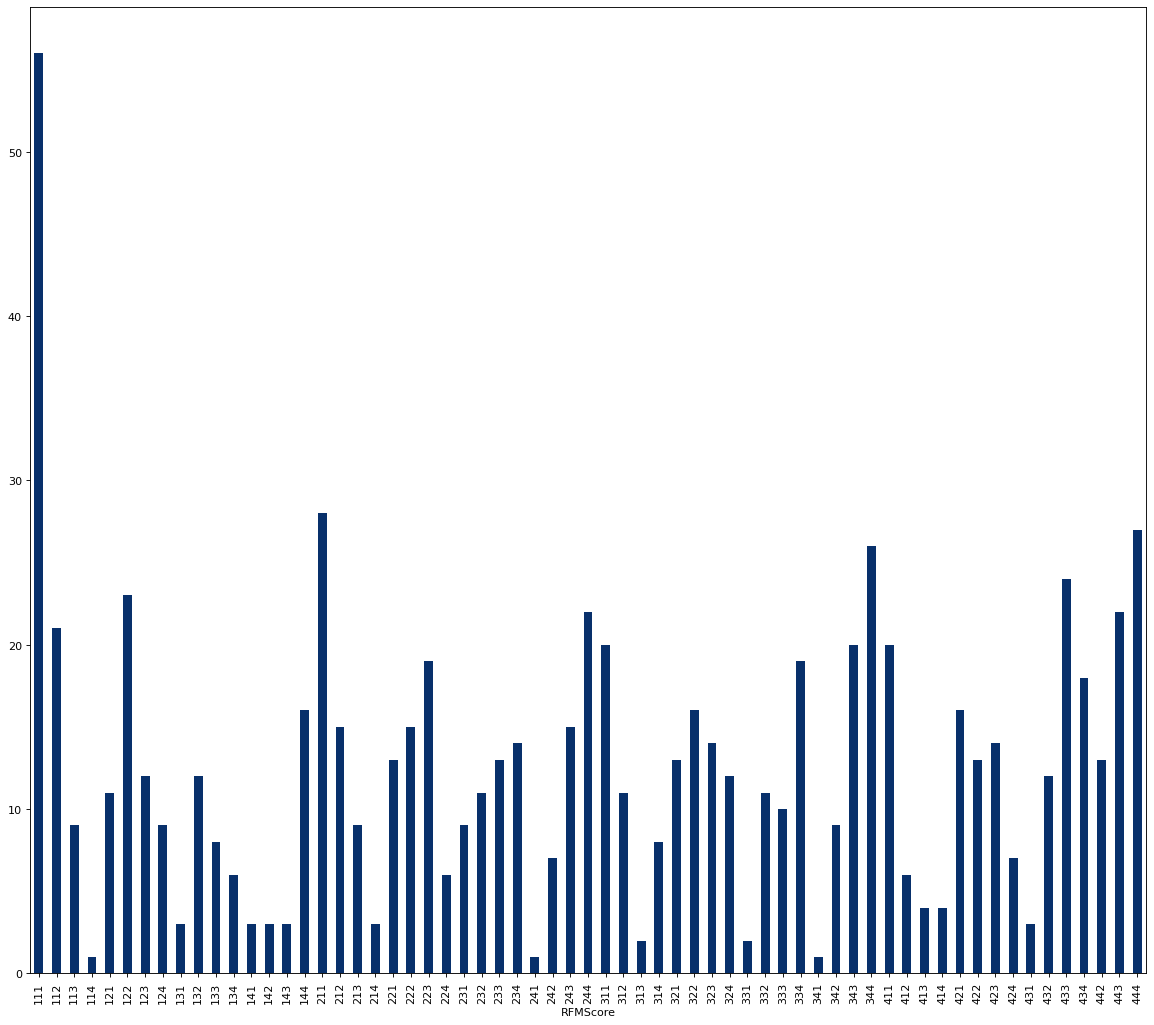

In [46]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
rfm_segmentation.groupby('RFMScore').agg('Recency').count().plot(kind='bar', colormap='Blues_r')
plt.show()

In [47]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Best Customers:  27
Loyal Customers:  188
Big Spenders:  198
Almost Lost:  22
Lost Customers:  16
Lost Cheap Customers:  56


# Кластерный анализ

In [50]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from kneed import KneeLocator

In [51]:
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country_region', 'city',
       'state', 'postal_code', 'region', 'product_id', 'category',
       'sub_category', 'product_name', 'sales', 'quantity', 'discount',
       'profit'],
      dtype='object')

In [52]:
cols = ["city", "state", "category", "sub_category", "region", "segment"]
data=df[cols]
data.head(3)

,city,state,category,sub_category,region,segment
0,Henderson,Kentucky,Furniture,Bookcases,South,Consumer
1,Henderson,Kentucky,Furniture,Chairs,South,Consumer
2,Los Angeles,California,Office Supplies,Labels,West,Corporate


In [53]:
#переводим категориальные переменные в числовые переменные
data_adj = data.copy()
data_adj.head(5)

,city,state,category,sub_category,region,segment
0,Henderson,Kentucky,Furniture,Bookcases,South,Consumer
1,Henderson,Kentucky,Furniture,Chairs,South,Consumer
2,Los Angeles,California,Office Supplies,Labels,West,Corporate
3,Fort Lauderdale,Florida,Furniture,Tables,South,Consumer
4,Fort Lauderdale,Florida,Office Supplies,Storage,South,Consumer


In [54]:
cat_col = ["city", "state", "category", "sub_category", "region", "segment"]

In [55]:
for col in cat_col:
    labelencoder = LabelEncoder()
    data_adj[col] = labelencoder.fit_transform(data_adj[col])

In [56]:
data_adj.head(7)

,city,state,category,sub_category,region,segment
0,194,15,0,4,2,0
1,194,15,0,5,2,0
2,266,3,1,10,3,1
3,153,8,0,16,2,0
4,153,8,1,14,2,0
5,266,3,0,9,3,0
6,266,3,1,2,3,0


In [57]:
#стандартизация x текущее-x среднее/делим на стандартное отклонение
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_adj)
scaled_data = pd.DataFrame(scaled_data, columns=data_adj.columns)

In [58]:
scaled_data

,city,state,category,sub_category,region,segment
0,-0.617727,-0.473638,-1.544978,-0.710815,0.369413,-0.864161
1,-0.617727,-0.473638,-1.544978,-0.512842,0.369413,-0.864161
2,-0.100303,-1.247640,0.043552,0.477027,1.229798,0.447170
3,-0.912371,-0.925139,-1.544978,1.664869,0.369413,-0.864161
4,-0.912371,-0.925139,0.043552,1.268921,0.369413,-0.864161
...,...,...,...,...,...,...
9989,0.108104,-0.925139,-1.544978,0.279053,0.369413,-0.864161
9990,-1.264507,-1.247640,-1.544978,0.279053,1.229798,-0.864161
9991,-1.264507,-1.247640,1.632082,1.070948,1.229798,-0.864161
9992,-1.264507,-1.247640,0.043552,0.872974,1.229798,-0.864161


In [59]:
X=scaled_data.values
X

array([[-0.6177269 , -0.47363803, -1.54497781, -0.71081548,  0.36941275,
        -0.86416091],
       [-0.6177269 , -0.47363803, -1.54497781, -0.51284179,  0.36941275,
        -0.86416091],
       [-0.10030313, -1.24764007,  0.04355184,  0.47702666,  1.22979752,
         0.44716981],
       ...,
       [-1.2645066 , -1.24764007,  1.6320815 ,  1.07094773,  1.22979752,
        -0.86416091],
       [-1.2645066 , -1.24764007,  0.04355184,  0.87297404,  1.22979752,
        -0.86416091],
       [ 1.70349361, -1.24764007,  0.04355184, -1.30473655,  1.22979752,
        -0.86416091]])

In [60]:
sse = []
for k in np.arange(1,10,1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=10)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

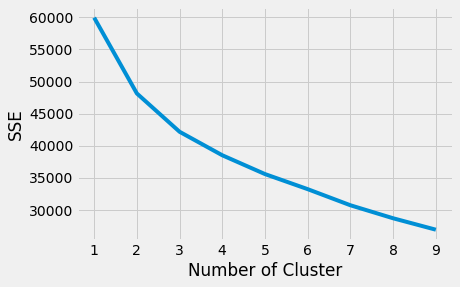

In [61]:
plt.style.use("fivethirtyeight")
plt.plot(np.arange(1,10,1), sse)
plt.xticks(np.arange(1,10,1))
plt.xlabel("Number of Cluster")
plt.ylabel("SSE")
plt.show()

In [62]:
K1 = KneeLocator(np.arange(1, 10, 1), sse, curve="convex", direction="decreasing")
K1.elbow

3

In [63]:
#model
kmeans = KMeans(n_clusters=2, n_init=10, max_iter=300, random_state=10)
kmeans.fit(scaled_data)

KMeans(n_clusters=2, random_state=10)

In [64]:
#к какому кластеру алгоритм отнес каждлого пользователя
cluster = kmeans.labels_
cluster

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [65]:
data_adj['cluster'] = cluster

In [66]:
data_adj.groupby('cluster').size()

cluster
0    3556
1    6438
dtype: int64

In [67]:
means = data_adj.groupby('cluster').mean()
means

,city,state,category,sub_category,region,segment
cluster,,,,,,
0,301.853206,4.959505,0.967379,7.592520,2.647919,0.660292
1,267.863156,31.945014,0.975458,7.589313,0.975614,0.658279


In [72]:
#попробуем запустить модель с 3 кластерами
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300, random_state=10)
kmeans.fit(scaled_data)

KMeans(n_clusters=3, random_state=10)

In [73]:
#к какому кластеру алгоритм отнес каждлого пользователя
cluster = kmeans.labels_
cluster

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [74]:
data_adj['cluster'] = cluster

In [75]:
data_adj.groupby('cluster').size()

cluster
0    2992
1    3612
2    3390
dtype: int64

In [76]:
means = data_adj.groupby('cluster').mean()
means

,city,state,category,sub_category,region,segment
cluster,,,,,,
0,127.472594,28.288770,0.969251,7.342914,0.631684,0.633021
1,380.542913,33.913344,0.982004,7.756645,1.290144,0.668882
2,307.366962,4.767847,0.965487,7.631858,2.698230,0.671386


In [77]:
#попробуем запустить модель с 4 кластерами
kmeans = KMeans(n_clusters=4, n_init=10, max_iter=300, random_state=10)
kmeans.fit(scaled_data)

KMeans(n_clusters=4, random_state=10)

In [78]:
#к какому кластеру алгоритм отнес каждлого пользователя
cluster = kmeans.labels_
cluster

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [79]:
data_adj['cluster'] = cluster

In [80]:
data_adj.groupby('cluster').size()

cluster
0    2657
1    3156
2    2403
3    1778
dtype: int64

In [81]:
means = data_adj.groupby('cluster').mean()
means

,city,state,category,sub_category,region,segment
cluster,,,,,,
0,383.995107,34.435454,0.931878,7.984569,1.373730,0.287919
1,311.852978,4.260773,0.959759,7.619138,2.746831,0.612801
2,122.636704,27.925094,0.948398,7.374532,0.641698,0.312526
3,280.491564,28.825647,1.088864,7.242407,1.032621,1.763780


Модель с 2 и 3 кластерами лучше, чем с 4 кластерами. В ситуации с 4 кластерами - кластерные группы не равны по численности, а также различия по некоторым параметрам в разных кластерах несущественны.
Если выбирать между моделью с 2 кластерами и 3 кластерами, с 3 кластерами модель предпочтительней - в ней получились более равыне по численности кластеры.